# Predicción Avanzada de series temporales univariantes


A continuación vamos a entrenar un modelo de series temporales univariantes para predecir el número de pasajeros de una aerolínea. Código basado en la documentación oficial de pycaret https://github.com/pycaret/pycaret y el artículo de Moez Ali https://moez-62905.medium.com/

### Instalación de librerias

In [11]:
#!pip install pycaret==2.2.3
#!pip install -U scikit-learn==0.23.2

In [12]:
#!pip install plotly==5.1.0 
#!pip install plotly-express==0.4.1

In [13]:
import pycaret
import sklearn
print(pycaret.__version__)
print(sklearn.__version__)

2.3.1
0.23.2


## Importación de datos

In [14]:
# read csv file
import pandas as pd
import numpy as np

data = pd.read_csv('data\AirPassengers.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## Transformación de datos

In [18]:
# extract month and year from dates
data['Month'] = [i.month for i in data['Date']]
data['Year'] = [i.year for i in data['Date']]

# create a sequence of numbers
data['Series'] = np.arange(1,len(data)+1)

# drop unnecessary columns and re-arrange
data.drop(['Date', 'MA12'], axis=1, inplace=True)
data = data[['Series', 'Year', 'Month', 'Passengers']] 

# check the head of the dataset
data.head()

,Series,Year,Month,Passengers
0,1,1949,1,112
1,2,1949,2,118
2,3,1949,3,132
3,4,1949,4,129
4,5,1949,5,121


### División de datos en train y test

In [19]:
# split data into train-test set
train = data[data['Year'] < 1960]
test = data[data['Year'] >= 1960]
# check shape
train.shape, test.shape


((132, 4), (12, 4))

### Preprocesamiento de datos

In [20]:
# import the regression module
from pycaret.regression import *

# initialize setup
s = setup(data = train, test_data = test, target = 'Passengers',
          fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'],
          fold = 3, transform_target = True, session_id = 123,
         silent=True)

,Description,Value
0,session_id,123
1,Target,Passengers
2,Original Data,"(132, 4)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(132, 13)"


## Entrenamiento del modelo de regresión

In [41]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [21]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,22.3980,923.8740,28.2856,0.5621,0.0878,0.0746,1.9767
lar,Least Angle Regression,22.3980,923.8666,28.2855,0.5621,0.0878,0.0746,0.0233
huber,Huber Regressor,22.4184,891.3113,27.9303,0.5990,0.0879,0.0749,0.0467
br,Bayesian Ridge,22.4783,932.2165,28.5483,0.5611,0.0884,0.0746,0.0333
ridge,Ridge Regression,23.1975,1003.9360,30.0408,0.5258,0.0933,0.0764,1.8000
lasso,Lasso Regression,38.4188,2413.5109,46.8468,0.0882,0.1473,0.1241,1.8033
en,Elastic Net,40.6486,2618.8759,49.4048,-0.0824,0.1563,0.1349,0.0267
omp,Orthogonal Matching Pursuit,44.3054,3048.2658,53.8613,-0.4499,0.1713,0.1520,0.0233
xgboost,Extreme Gradient Boosting,46.7192,3791.0476,59.9683,-0.5515,0.1962,0.1432,0.2267
gbr,Gradient Boosting Regressor,49.3197,3925.4366,60.5087,-0.5759,0.2002,0.1511,0.0433


# Combinación de modelos

La combinación de mnodelos (ensembling) es otra técnica común para mejorar el rendimiento de los modelos individuales. En el aprendizaje automático, se combinan las decisiones de varios modelos para mejorar el rendimiento general. Hay varias técnicas para ensamblar que cubriremos en esta sección. Estos incluyen Bagging y Boosting. Usaremos la función ensemble_model () en PyCaret

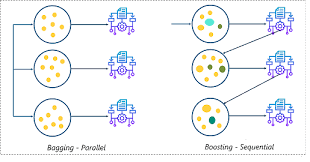

Fuente de la imagen:https://medium.com/@maniyaswanth123/bagging-and-boosting-a0b39e312117

## Bagging

In [57]:
bagged = ensemble_model(best, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18.6477,692.0707,26.3072,0.3007,0.1056,0.0852
1,11.1359,209.0387,14.4582,0.9157,0.0449,0.0364
2,34.8212,1681.5909,41.0072,0.6126,0.1018,0.0910
Mean,21.5349,860.9001,27.2575,0.6097,0.0841,0.0709
SD,9.8826,612.9057,10.8594,0.2511,0.0277,0.0245


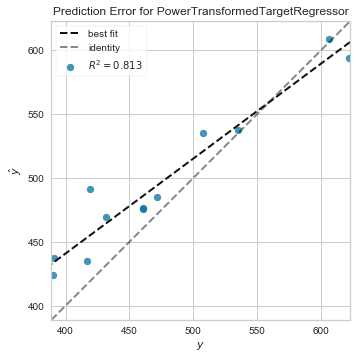

In [63]:
plot_model(bagged, plot='error')

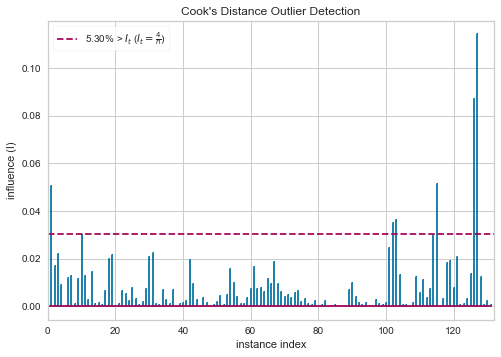

In [66]:
plot_model(bagged, plot='cooks')

Mas graficos en https://pycaret.org/plot-model/

## Boosting

In [58]:
boosted = ensemble_model(best, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,23.2914,1137.5094,33.7270,-0.1494,0.1314,0.1058
1,10.2073,208.5596,14.4416,0.9159,0.0426,0.0321
2,35.4042,1679.2823,40.9790,0.6131,0.1017,0.0925
Mean,22.9676,1008.4504,29.7159,0.4599,0.0919,0.0768
SD,10.2891,607.3157,11.1990,0.4482,0.0369,0.0321


## Blending Models

La blending es otra técnica común para ensamblar que se puede usar en PyCaret. Crea múltiples modelos y luego promedia las predicciones individuales para formar una predicción final. Si no se pasa ninguna lista, PyCaret usa todos los modelos disponibles en la biblioteca de modelos de forma predeterminada.

In [42]:
huber = create_model('huber', verbose = False)
rf = create_model('rf', verbose = False)
lar = create_model('lar', verbose = False)
lr = create_model('lr',verbose=False)

In [59]:
#we will create 4 specific models to be passed into blend_models()
tuned_rf = tune_model(rf)
tuned_huber = tune_model(huber)
tuned_lar = tune_model(lar)
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20.5658,819.0068,28.6183,0.1724,0.1157,0.0949
1,11.0114,210.1223,14.4956,0.9153,0.0445,0.0358
2,35.6145,1742.3307,41.7412,0.5986,0.1033,0.0930
Mean,22.3972,923.8199,28.2850,0.5621,0.0878,0.0746
SD,10.1273,629.8968,11.1255,0.3044,0.0311,0.0274


In [44]:
blend_specific = blend_models(estimator_list = [tuned_rf,tuned_lar,tuned_lr,tuned_huber])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12.6354,230.7430,15.1902,0.7668,0.0762,0.0617
1,27.5541,1191.7621,34.5219,0.5194,0.1068,0.0844
2,21.4340,715.0835,26.7410,0.8353,0.0626,0.0515
Mean,20.5412,712.5295,25.4844,0.7072,0.0819,0.0659
SD,6.1232,392.3385,7.9420,0.1357,0.0185,0.0138


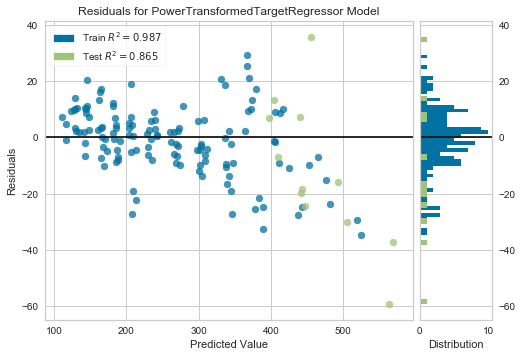

In [45]:
plot_model(blend_specific)

### Stacking

El stacking es otra técnica popular para ensamblar, pero se implementa con menos frecuencia debido a dificultades prácticas. El stacking es una técnica de aprendizaje por conjuntos que combina varios modelos a través de un metamodelo. Otra forma de pensar sobre el stacking es que se entrenan varios modelos para predecir el resultado y se crea un metamodelo que usa las predicciones de esos modelos como entrada junto con las características originales. La implementación de stack_models ()